In [5]:
#import gensim
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib

import re
import codecs
import itertools
import matplotlib.pyplot as plt


In [6]:
input_file = codecs.open("socialmedia_relevant_cols.csv", "r",encoding='utf-8', errors='replace')

# read_csv will turn CSV files into dataframes
questions = pd.read_csv(input_file)
questions.columns



Index(['text', 'choose_one', 'class_label'], dtype='object')

In [7]:
questions.head()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [8]:
def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    # get rid of URLS
    #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"http\S+", "", elem))  
    df[text_field] = df[text_field].apply(lambda y: re.sub(r"[^a-zA-Z]", " ", y))  
    
    return df

In [9]:
clean_questions = standardize_text(questions, "text")

print(clean_questions.head())

                                                text choose_one  class_label
0                 just happened a terrible car crash   Relevant            1
1  our deeds are the reason of this  earthquake m...   Relevant            1
2  heard about  earthquake is different cities  s...   Relevant            1
3  there is a forest fire at spot pond  geese are...   Relevant            1
4             forest fire near la ronge sask  canada   Relevant            1


In [10]:
clean_questions.groupby("class_label").count()

,text,choose_one
class_label,,
0,6187,6187
1,4673,4673
2,16,16


In [ ]:

# =============================================================================
#
# 
# questions["text"]=questions["text"].word_tokenize(questions["text"]
# 
# =============================================================================

In [11]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)


In [12]:
all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

189648 words total, with a vocabulary size of 28523
Max sentence length is 33


In [13]:
print (VOCAB[0:100])

['a', 'aa', 'aaaa', 'aaaaaaallll', 'aaaaaand', 'aaarrrgghhh', 'aace', 'aaffndcdnq', 'aag', 'aahyoeitzl', 'aal', 'aamir', 'aan', 'aannnnd', 'aapatwork', 'aar', 'aaron', 'aarongoodwin', 'aaronkearneyaus', 'aaronthefm', 'aasfmvbl', 'aashiqui', 'aassfrdp', 'aatt', 'aauizggc', 'aawmx', 'aawzxykles', 'ab', 'aba', 'abandon', 'abandoned', 'abandonedpics', 'abandoning', 'abandons', 'abba', 'abbandoned', 'abbog', 'abbott', 'abbruchsimulator', 'abbss', 'abbswinston', 'abbyairshow', 'abbydphillip', 'abc', 'abcfmelissajoey', 'abcnetwork', 'abcnews', 'abcnorio', 'abdul', 'abe', 'abella', 'aberdeen', 'aberdeenfanpage', 'aberdeenfc', 'aberystwyth', 'abgct', 'abgfglh', 'abh', 'abha', 'abia', 'abide', 'ability', 'abject', 'abkhbhnloz', 'ablaze', 'able', 'ableg', 'ablz', 'abninfvet', 'abnormally', 'abnzqwlig', 'aboard', 'abolishing', 'abolxmh', 'abomb', 'abomination', 'aboooooortiooooonnnnns', 'aboriginal', 'aborted', 'abortion', 'abortions', 'abounds', 'about', 'abouts', 'above', 'aboveandbeyond', 'abpm

In [14]:
# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

[('t', 7636),
 ('co', 6812),
 ('http', 6161),
 ('the', 4628),
 ('a', 3264),
 ('to', 2840),
 ('in', 2815),
 ('i', 2656),
 ('of', 2612),
 ('and', 2026),
 ('s', 1534),
 ('is', 1396),
 ('you', 1289),
 ('for', 1247),
 ('on', 1241),
 ('it', 1145),
 ('my', 980),
 ('that', 855),
 ('with', 799),
 ('by', 782),
 ('at', 749),
 ('this', 705),
 ('https', 619),
 ('from', 615),
 ('m', 611),
 ('be', 604),
 ('are', 603),
 ('was', 554),
 ('have', 513),
 ('amp', 510),
 ('like', 493),
 ('as', 488),
 ('up', 479),
 ('just', 459),
 ('we', 454),
 ('me', 451),
 ('but', 436),
 ('so', 435),
 ('not', 432),
 ('your', 430),
 ('out', 413),
 ('no', 405),
 ('all', 381),
 ('will', 372),
 ('after', 370),
 ('fire', 367),
 ('when', 365),
 ('an', 364),
 ('can', 362),
 ('if', 358),
 ('he', 356),
 ('has', 342),
 ('get', 337),
 ('new', 331),
 ('they', 327),
 ('more', 325),
 ('via', 325),
 ('news', 315),
 ('about', 312),
 ('now', 312),
 ('what', 311),
 ('u', 300),
 ('or', 296),
 ('how', 294),
 ('one', 286),
 ('people', 285),
 (

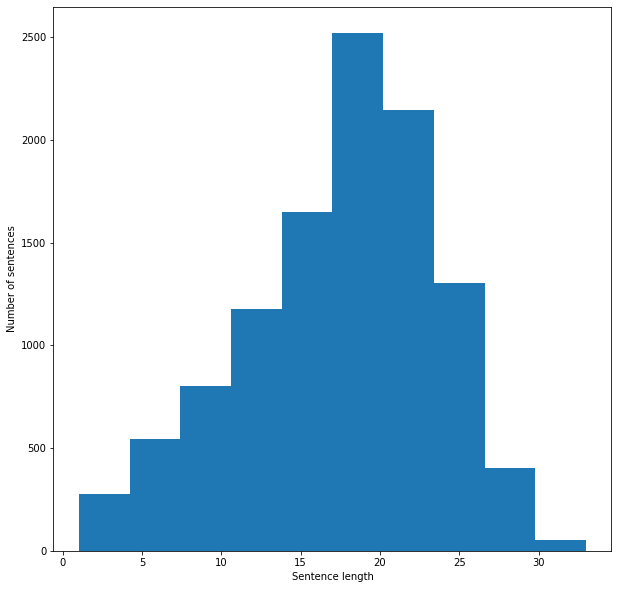

In [15]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

list_corpus = clean_questions["text"]
list_labels = clean_questions["class_label"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

print("Training set: %d samples" % len(X_train))
print("Test set: %d samples" % len(X_test))

Training set: 8700 samples
Test set: 2176 samples


In [17]:
print (X_train[:10])

2354         thehighfessions   my friend came to school...
9734     dtn india  rly tragedy in mp  some live to rec...
9332      ddnewslive  nitishkumar  and  arvindkejriwal ...
10831    three days off from work and they ve pretty mu...
3125     malaysian officials say debris found on reunio...
9836      arobotlegion so be it  you can t tell an oppr...
302            annihilated abs      http   t co  xpw   tje
9872     america like south africa is a traumatised sic...
4638     get emergency edmonton locksmith services  in ...
9309       things all affiliate marketers need to survi...
Name: text, dtype: object


In [18]:
print (y_train[:10])

2354     0
9734     1
9332     0
10831    0
3125     1
9836     0
302      1
9872     0
4638     0
9309     0
Name: class_label, dtype: int64


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(8700, 24501)
(2176, 24501)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

print(tfidf["train"][0].shape)
print(tfidf["test"][0].shape)


(8700, 24501)
(2176, 24501)


In [21]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

print ('DONE - [CLASSIFY] Initialize Logistic Regression')


DONE - [CLASSIFY] Initialize Logistic Regression


In [22]:
from sklearn.svm import LinearSVC

lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

print ('[CLASSIFY] Initialize Support Vector Machine Classifier')


[CLASSIFY] Initialize Support Vector Machine Classifier


In [23]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

print ('DONE - [CLASSIFY] Initialize Naive Bayes')

DONE - [CLASSIFY] Initialize Naive Bayes


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [25]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

print ('DONE - [EVALUATE] Prepare Metrics')


DONE - [EVALUATE] Prepare Metrics


In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

print ('DONE - [EVALUATE] Confusion Matrix')

DONE - [EVALUATE] Confusion Matrix


In [27]:
embedding = bow                  # bow | tfidf | w2v

print ('DONE - [EMBEDDING] CHOOSE EMBEDDING')

classifier = lr_classifier     # lr_classifier | lsvm_classifier | nb_classifier| dt_classifier

print ('DONE - [CLASSIFY] CHOOSE CLASSIFIER')

DONE - [EMBEDDING] CHOOSE EMBEDDING
DONE - [CLASSIFY] CHOOSE CLASSIFIER


In [29]:
classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])
print ('DONE - [CLASSIFY] Train Classifier on Embeddings')

DONE - [CLASSIFY] Train Classifier on Embeddings


In [30]:
accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.770, precision = 0.768, recall = 0.770, f1 = 0.768


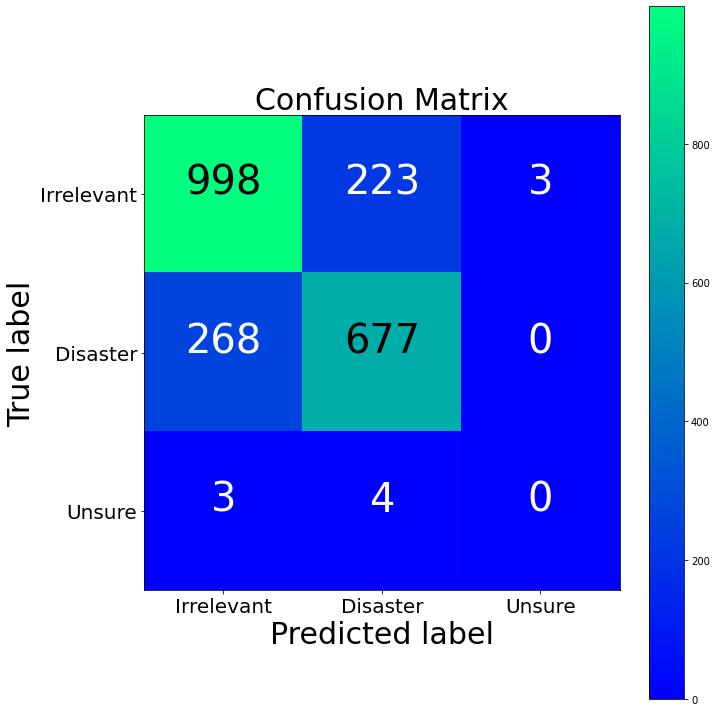

In [31]:
cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster', 'Unsure'], normalize=False, title='Confusion Matrix')
plt.show()